# [Trading moving averages in Python](https://www.youtube.com/watch?v=cwEORaERl2o&t=0s)

The simplest algorithmic trading strategy for beginners!

- A moving average (MA) is a stock indicator that is commonly used in technical analysis.
- The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.
- A simple moving average (SMA) is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 15, 30, 100, or 200 days.
- Exponential moving averages (EMA) is a weighted average that gives greater importance to the price of a stock in more recent days, making it an indicator that is more responsive to new information.

## Simple Moving Average

$$
    SMA = \frac{ \sum \limits_{i}^{n} A_i}{n}
$$
where A = average in period n
n = number of time periods

## Exponential Moving Average

$$
EMA_t = V_t \left( \frac{s}{1+d} \right) + EMA_y \left( 1 - \frac{s}{1 + d} \right)
$$
where t = today
y = yesterday
s = smoothing
d = number of dayes
V = value
EMA = exponential moving average

## Signals

MA20 greater than MA50 the day before then Buy
MA50 greater than MA20 the day before then Sell

In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
import yfinance as yf

In [2]:
ticker = "^GDAXI"
df = yf.download(ticker, start="2021-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
df["MA20"] = df["Adj Close"].rolling(20).mean()
df["MA50"] = df["Adj Close"].rolling(50).mean()
df = df.dropna()
df = df["AdjClose", "MA20", "MA50"]

In [6]:
Buy = []
Sell = []
for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50.iloc[i] and df.MA20.iloc[i-1] < df.MA50.iloc[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50.iloc[i] and df.MA20.iloc[i-1] > df.MA50.iloc[i-1]:
        Sell.append(i)

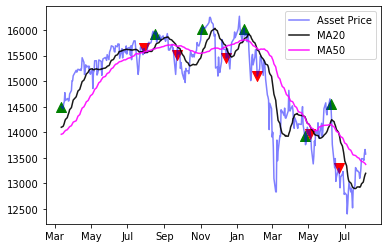

In [10]:
plt.plot(df["Adj Close"], label="Asset Price", c="blue", alpha=0.5)
plt.plot(df["MA20"], label="MA20", c='k', alpha=0.9)
plt.plot(df["MA50"], label="MA50", c='magenta', alpha=0.9)
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]['Adj Close'], marker="^", color="g", s=100)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]['Adj Close'], marker="v", color="r", s=100)
plt.gca().xaxis.set_major_formatter(DateFormatter("%b", tz=None))
plt.legend()
plt.show()